In [1]:
import pandas as pd
import requests
import urllib.request
import time
from bs4 import BeautifulSoup

In [2]:
# Initialize an empty list to store all the scraped data
all_data = []

for char_code in range(ord('A'), ord('Z')+1):
    url = 'https://www.malaysiastock.biz/Listed-Companies.aspx?type=A&value=' + chr(char_code)
    response = requests.get(url)

    soup = BeautifulSoup(response.text, "html.parser")
    table = soup.findAll('table', {'class': 'marketWatch'})

    # Extract data from the table and append to all_data list
    if table:
        example = list(table[0])
        example2 = [x for x in example if x != "\n"]
        prices = []
        for i in range(1, len(example2)):
            entry = example2[i].get_text(separator="\n").split("\n")
            entry_filtered = [x for x in entry if x]
            prices.append(entry_filtered)
        all_data.extend(prices)
        
    print("Done the process of scraping from " + url)

# Create DataFrame from the accumulated data
complete_table = pd.DataFrame(all_data, columns=["Company Code", "Market", "Company Name", "Sector", "Market Cap", "Last Price", "PE", "DY", "ROE"])


NameError: name 'abc' is not defined

In [ ]:
print(complete_table.head())
complete_table.to_csv('complete_data.csv', index=False)

      Company Code Market                  Company Name  \
0     AASIA (7054)   MAIN            ASTRAL ASIA BERHAD   
1       AAX (5238)   MAIN              AIRASIA X BERHAD   
2  ABFMY1 (0800EA)    ETF  ABF MALAYSIA BOND INDEX FUND   
3  ABLEGLOB (7167)   MAIN            ABLE GLOBAL BERHAD   
4   ABLEGRP (7086)   MAIN              ABLEGROUP BERHAD   

                           Sector Market Cap Last Price     PE    DY     ROE  
0                     Plantation      79.20m       0.12      -  0.00   -5.52  
1  Travel, Leisure & Hospitality     599.08m       1.34   1.63  0.00  282.66  
2                      Bond Fund      1.764b       1.23      -  0.37       -  
3               Food & Beverages     543.32m       1.75  10.45  3.71   11.71  
4             Building Materials      29.03m       0.11  47.83  0.00    1.44  


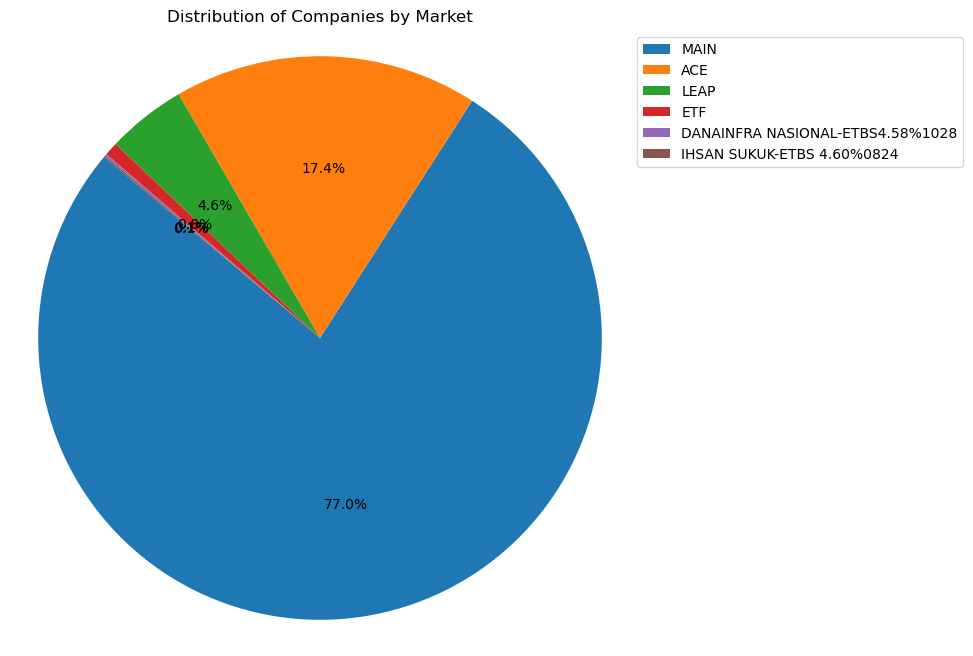

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors  # Import the mplcursors library

# Assuming complete_table is the DataFrame containing the data
complete_table = pd.read_csv('complete_data.csv')

# Count the occurrences of each market category
market_counts = complete_table['Market'].value_counts()

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(market_counts, labels=None, autopct='%1.1f%%', startangle=140)

# Adding legend with market categories
ax.legend(market_counts.index, loc="best", bbox_to_anchor=(1, 1))

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Add hover annotations
mplcursors.cursor(hover=True).connect(
    "add", lambda sel: sel.annotation.set_text(f"Number of companies: {market_counts[sel.index]}")
)

plt.title('Distribution of Companies by Market')
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Assuming complete_table is the DataFrame containing the data
complete_table = pd.read_csv('complete_data.csv')

# Count the occurrences of each sector in each market segment
main_sector_counts = complete_table[complete_table['Market'] == 'MAIN']['Sector'].value_counts()
ace_sector_counts = complete_table[complete_table['Market'] == 'ACE']['Sector'].value_counts()
leap_sector_counts = complete_table[complete_table['Market'] == 'LEAP']['Sector'].value_counts()

# Combine sector counts into a single DataFrame
sector_counts_df = pd.DataFrame({
    'Sector': main_sector_counts.index.tolist() + ace_sector_counts.index.tolist() + leap_sector_counts.index.tolist(),
    'Main Market': main_sector_counts.values.tolist() + [0] * len(ace_sector_counts) + [0] * len(leap_sector_counts),
    'ACE Market': [0] * len(main_sector_counts) + ace_sector_counts.values.tolist() + [0] * len(leap_sector_counts),
    'LEAP Market': [0] * len(main_sector_counts) + [0] * len(ace_sector_counts) + leap_sector_counts.values.tolist()
})

sector_counts_df

# Plot stacked bar chart with hover information
fig = px.bar(sector_counts_df, x='Sector', y=['Main Market', 'ACE Market', 'LEAP Market'],
             title='Sector Distribution by Market',
             labels={'value': 'Number of Companies', 'variable': 'Market'},
             hover_data={'value': True, 'variable': False},
             color_discrete_map={'Main Market': 'skyblue', 'ACE Market': 'lightgreen', 'LEAP Market': 'salmon'},
             barmode='stack')

# Show plot
fig.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Sample data
data = {
    'Sector': ['Technology', 'Finance', 'Healthcare', 'Energy', 'Consumer Goods'],
    'Market Cap (in billions)': [100, 80, 60, 40, 50]
}

df = pd.DataFrame(data)

# Create bar chart
fig = px.bar(df, x='Sector', y='Market Cap (in billions)', title='Market Cap by Sector')
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Assuming complete_table is the DataFrame containing the data
complete_table = pd.read_csv('complete_data.csv')

# Plot Market Cap vs. Sector
fig = px.scatter(complete_table, x='Sector', y='Market Cap',
                 title='Market Cap vs. Sector',
                 labels={'Market Cap': 'Market Cap (in billions)'},
                 color='Sector')

# Show plot
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Read data from CSV file
df = pd.read_csv('complete_data.csv')

# Convert 'DY' column to numeric, coercing errors to NaN
df['DY'] = pd.to_numeric(df['DY'], errors='coerce')

# Group by Sector and calculate average DY
sector_dy = df.groupby('Sector')['DY'].mean().reset_index()

# Plot DY vs. Sector
fig = px.bar(sector_dy, x='Sector', y='DY',
             title='Dividend Yield (DY) by Sector',
             labels={'DY': 'Average Dividend Yield'},
             color='Sector')

# Show plot
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Read data from CSV file
complete_table = pd.read_csv('complete_data.csv')

#  Convert 'DY' column to numeric, coercing errors to NaN
df['DY'] = pd.to_numeric(df['DY'], errors='coerce')

# Get unique sectors
sectors = df['Sector'].unique()

# Create a subplot for each sector
fig = go.Figure()

for i, sector in enumerate(sectors):
    sector_df = df[df['Sector'] == sector]
    fig.add_trace(go.Box(y=sector_df['DY'], name=sector))

# Update layout
fig.update_layout(title='Distribution of Dividend Yield (DY) by Sector',
                  xaxis_title='Sector',
                  yaxis_title='Dividend Yield')

# Show plot
fig.show()